In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, percentileofscore

df = pd.read_csv("C:/Users/Lenovo/anaconda3/baby.csv",delimiter=',')

In [2]:
df.head()

,Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight,Maternal.Smoker
0,1,120,284,27,62,100,False
1,2,113,282,33,64,135,False
2,3,128,279,28,64,115,True
3,4,108,282,23,67,125,True
4,5,136,286,25,62,93,False


In [3]:
df= df.drop('Unnamed: 0', axis=1)

In [4]:
df

,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight,Maternal.Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False
...,...,...,...,...,...,...
1169,113,275,27,60,100,False
1170,128,265,24,67,120,False
1171,130,291,30,65,150,True
1172,125,281,21,65,110,False


In [5]:
#1. Realiza una exploración de los datos, considerando sus tipos y los descriptivos correspondientes.
df.count()

Birth.Weight                 1174
Gestational.Days             1174
Maternal.Age                 1174
Maternal.Height              1174
Maternal.Pregnancy.Weight    1174
Maternal.Smoker              1174
dtype: int64

In [6]:
df.describe()

,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight
count,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000
mean,119.462521,279.101363,27.228279,64.049404,128.478705
std,18.328671,16.010305,5.817839,2.526102,20.734282
min,55.000000,148.000000,15.000000,53.000000,87.000000
25%,108.000000,272.000000,23.000000,62.000000,114.250000
50%,120.000000,280.000000,26.000000,64.000000,125.000000
75%,131.000000,288.000000,31.000000,66.000000,139.000000
max,176.000000,353.000000,45.000000,72.000000,250.000000


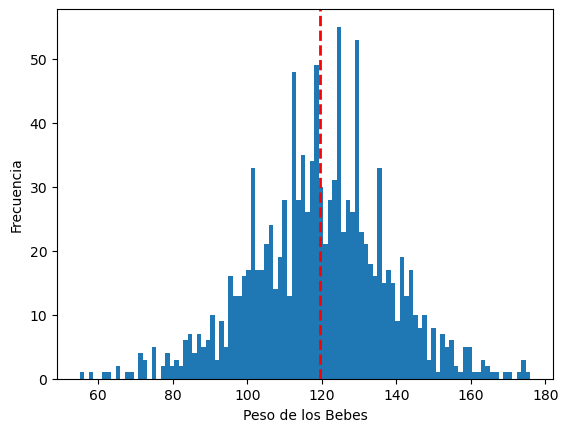

In [8]:
#2-Considera los pesos de los bebés. ¿Se puede decir que siguen una distribución normal? Justifica tu respuesta creando los gráficos y modelos necesarios.

Pesos=df['Birth.Weight'].dropna()
media=np.mean(Pesos)
plt.hist(Pesos, bins=100)
plt.axvline(x=media, color='red', linestyle='dashed', linewidth=2, label='Media')
plt.xlabel('Peso de los Bebes')
plt.ylabel('Frecuencia')
plt.show()

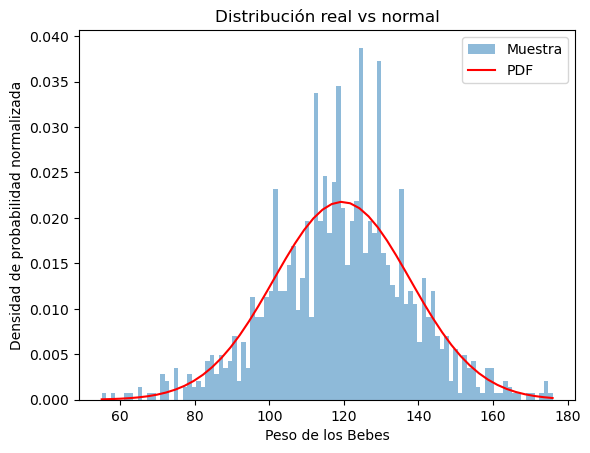

In [17]:
# Datos iniciales
mu=Pesos.mean()
sigma=Pesos.std()
minimo=Pesos.min()
maximo=Pesos.max()
x = np.linspace(minimo, maximo)
pdf = norm.pdf(x, loc=mu, scale=sigma)

plt.hist(Pesos, bins=100, density=True, alpha=0.5, label='Muestra')

plt.plot(x, pdf, color='red', label='PDF') 
plt.xlabel('Peso de los Bebes')
plt.ylabel('Densidad de probabilidad normalizada')
plt.title('Distribución real vs normal')
plt.legend()
plt.show()

# Dado ambos gráficos se puede observar que los datos se distribuyen normal.


In [ ]:
#3. Considerando lo anterior, verifica el modelo de distribución normal de los pesos para 5 valores diferentes. Compara con los datos reales.

In [18]:
listado = [80,90,100,120,140]

for i in listado:
    prob_real = round(percentileofscore(Pesos,i),1)
    prob_normal = round((norm.cdf(i,loc=mu, scale=sigma))*100,1)
    print(f' Para valor  {i} la probabilidad real es {prob_real} y ajustado a normal es {prob_normal }')

 Para valor  80 la probabilidad real es 2.3 y ajustado a normal es 1.6
 Para valor  90 la probabilidad real es 5.7 y ajustado a normal es 5.4
 Para valor  100 la probabilidad real es 13.8 y ajustado a normal es 14.4
 Para valor  120 la probabilidad real es 50.4 y ajustado a normal es 51.2
 Para valor  140 la probabilidad real es 88.1 y ajustado a normal es 86.9


In [19]:
#4. Compara los pesos de los bebés de madres fumadoras y no fumadoras. ¿Qué diferencias existen? Explica y construye los modelos correspondientes.

Pesos_Madres_F=df[df['Maternal.Smoker']==True]['Birth.Weight']
Pesos_Madres_NF=df[df['Maternal.Smoker']==False]['Birth.Weight']


In [20]:
def get_psd(x):
  mu=x.mean()
  sigma=x.std()
  minimo=x.min()
  maximo=x.max()
  x = np.linspace(minimo, maximo)
  pdf = norm.pdf(x, loc=mu, scale=sigma)
  return(x,pdf)


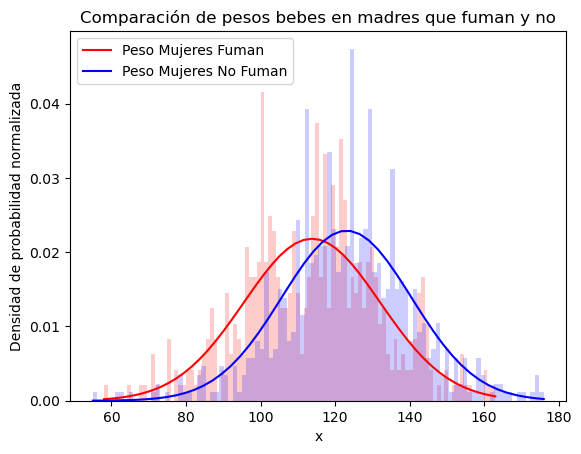

In [21]:
x,pdf=get_psd(Pesos_Madres_F)
plt.plot(x , pdf, color='red', label='Peso Mujeres Fuman')

x,pdf=get_psd(Pesos_Madres_NF)
plt.plot(x , pdf, color='blue', label='Peso Mujeres No Fuman')
plt.hist(Pesos_Madres_F, bins=100, density=True, alpha=0.2, color='red')
plt.hist(Pesos_Madres_NF, bins=100, density=True, alpha=0.2, color='blue')
plt.xlabel('x')
plt.ylabel('Densidad de probabilidad normalizada')
plt.title('Comparación de pesos bebes en madres que fuman y no')
plt.legend()
plt.show()

#Se puede observar que ambas curvas no son complementamente iguales, se recomienda realizar prueba de hipotesis para determinar si
#las diferencias son significativas.

In [22]:
#5. Considerando los datos dados:a Calcula la probabilidad de que una madre escogida al azar fume.
probabilidad_fume = Pesos_Madres_F.count()/ df.shape[0]
probabilidad_fume 

0.3909710391822828

In [26]:
# Para el modelo binomial
p= probabilidad_fume
k= 5

medias_bin = []
for i in range(1000):
    medias_bin.append(np.mean(np.random.binomial(5,p,size=8)))

In [36]:
# Para los datos muestrales
dato=df['Maternal.Smoker']
fuma = np.where(dato,1,0)
fuma
media = []

In [37]:
for i in range(1000):
        muestra = []
        for j in range(8):
            muestra.append( sum (np.random.choice(fuma,size=5, replace=False)))
        media.append(np.mean(muestra))        

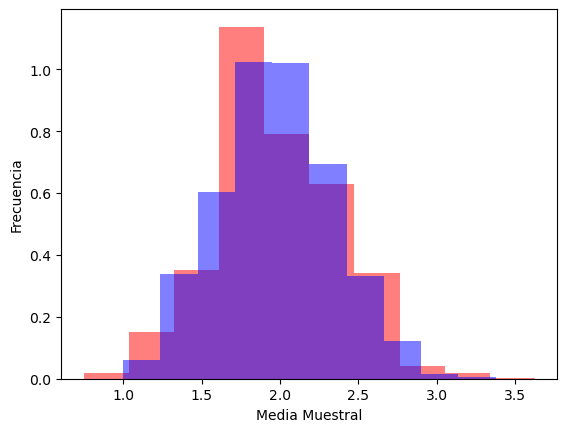

In [43]:
plt.hist(medias_bin, bins=10, density=True, alpha=0.5, color='red', label = 'Binomial Teórico')
plt.hist(media, bins=10, density=True, alpha=0.5, color='blue', label = 'Real' )
plt.xlabel('Media Muestral')
plt.ylabel('Frecuencia')
plt.show()


# Se observa que para grandes muestras la media tiende a ser normal.


In [47]:
#Ahora se modelo una normal con los datos de los datos de la muestra. 

mu = np.mean(media)
desv=np.std(media)
minimo=np.min(medias_bin)
maximo=np.max(medias_bin)
x= np.linspace( minimo, maximo, num=50)
pdf = norm.pdf (x,mu,desv)

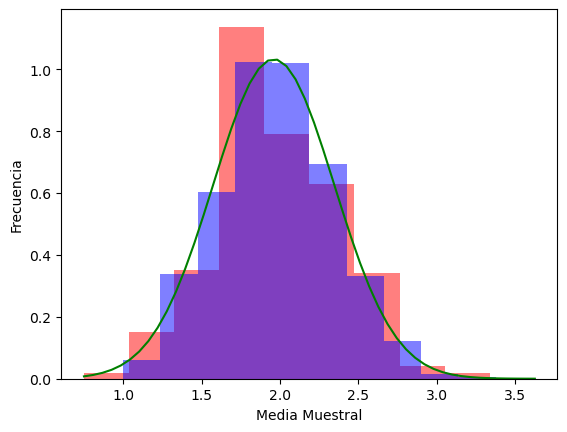

In [48]:
plt.hist(medias_bin, bins=10, density=True, alpha=0.5, color='red', label = 'Binomial Teórico')
plt.hist(media, bins=10, density=True, alpha=0.5, color='blue', label = 'Real' )
plt.plot(x,pdf, color='green', label = 'Distribución Normal')
plt.xlabel('Media Muestral')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
#Despues de N repeticiones la binomial tiende a una normal, ya que graficamente se puede observar que se ajusta a una normal.